# Dimensionality Reduction Comparisons

## Importing Items

In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
import umap


curPlace = os.getcwd() + '\output files\CombinedData.xlsx'

C:\Users\torre\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing the Data

In [2]:
data = pd.read_excel(curPlace)
data = data.to_numpy()
size = np.shape(data)
Names = pd.DataFrame(data[:,1])
data = data[:,2:size[1]]

## Standardizing the Scaling

In [3]:
# standardizing the data
x = StandardScaler().fit_transform(data)
#x_train, x_test, y_train, y_test = train_test_split(x[:,0:2], x[:,3:4], random_state = 42, test_size = 0.25, shuffle = True)
#print(x_test)
#print(y_test)

## Creating the Output Files Directory if it Does not Exsit

In [4]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\output files'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

## Passing the data through a PCA and exproting the PCA data

In [5]:
# creating a PCA Transformation and storing it in an excel file
pca = PCA(n_components = 2, random_state = 42)
principalComponents = pca.fit_transform(x)
principalComponents = np.hstack((Names,principalComponents))
principalDf = pd.DataFrame(data = principalComponents, columns = ['Figure Number',' PCA Component 1', 'PCA Component 2'])
principalDf.to_excel(os.getcwd() + '\\output files\\PCA Analysis.xlsx')

## K Means Clustering with PCA

In [6]:
data = list(zip(principalDf.iloc[:,1], principalDf.iloc[:,2]))
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
kmeans.fit(data)

C:\Users\torre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=42)

## Creating the Figure Outputs Directory if it Does not Exist

In [7]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\figure outputs'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

## Display and Save the PCA Visual Labeled with K Means Clustering

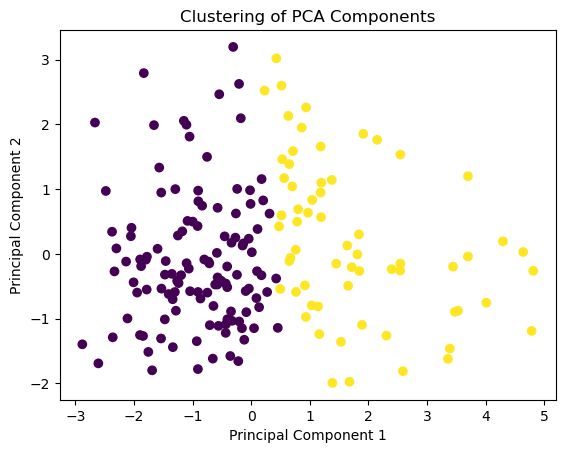

<Figure size 640x480 with 0 Axes>

In [8]:
plt.scatter(principalDf.iloc[:,1], principalDf.iloc[:,2],c = kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of PCA Components')
plt.show()
plt.savefig(os.getcwd() + '\\figure outputs\\PCA Analysis.png')
PCALabels = kmeans.labels_

## Re reading the Data

In [9]:
data = pd.read_excel(curPlace)
size = data.shape
Names = pd.DataFrame(data.iloc[:,1])
data = data.iloc[:,2:size[1]]
size = data.shape

## Creating a Data Comparison Matrix

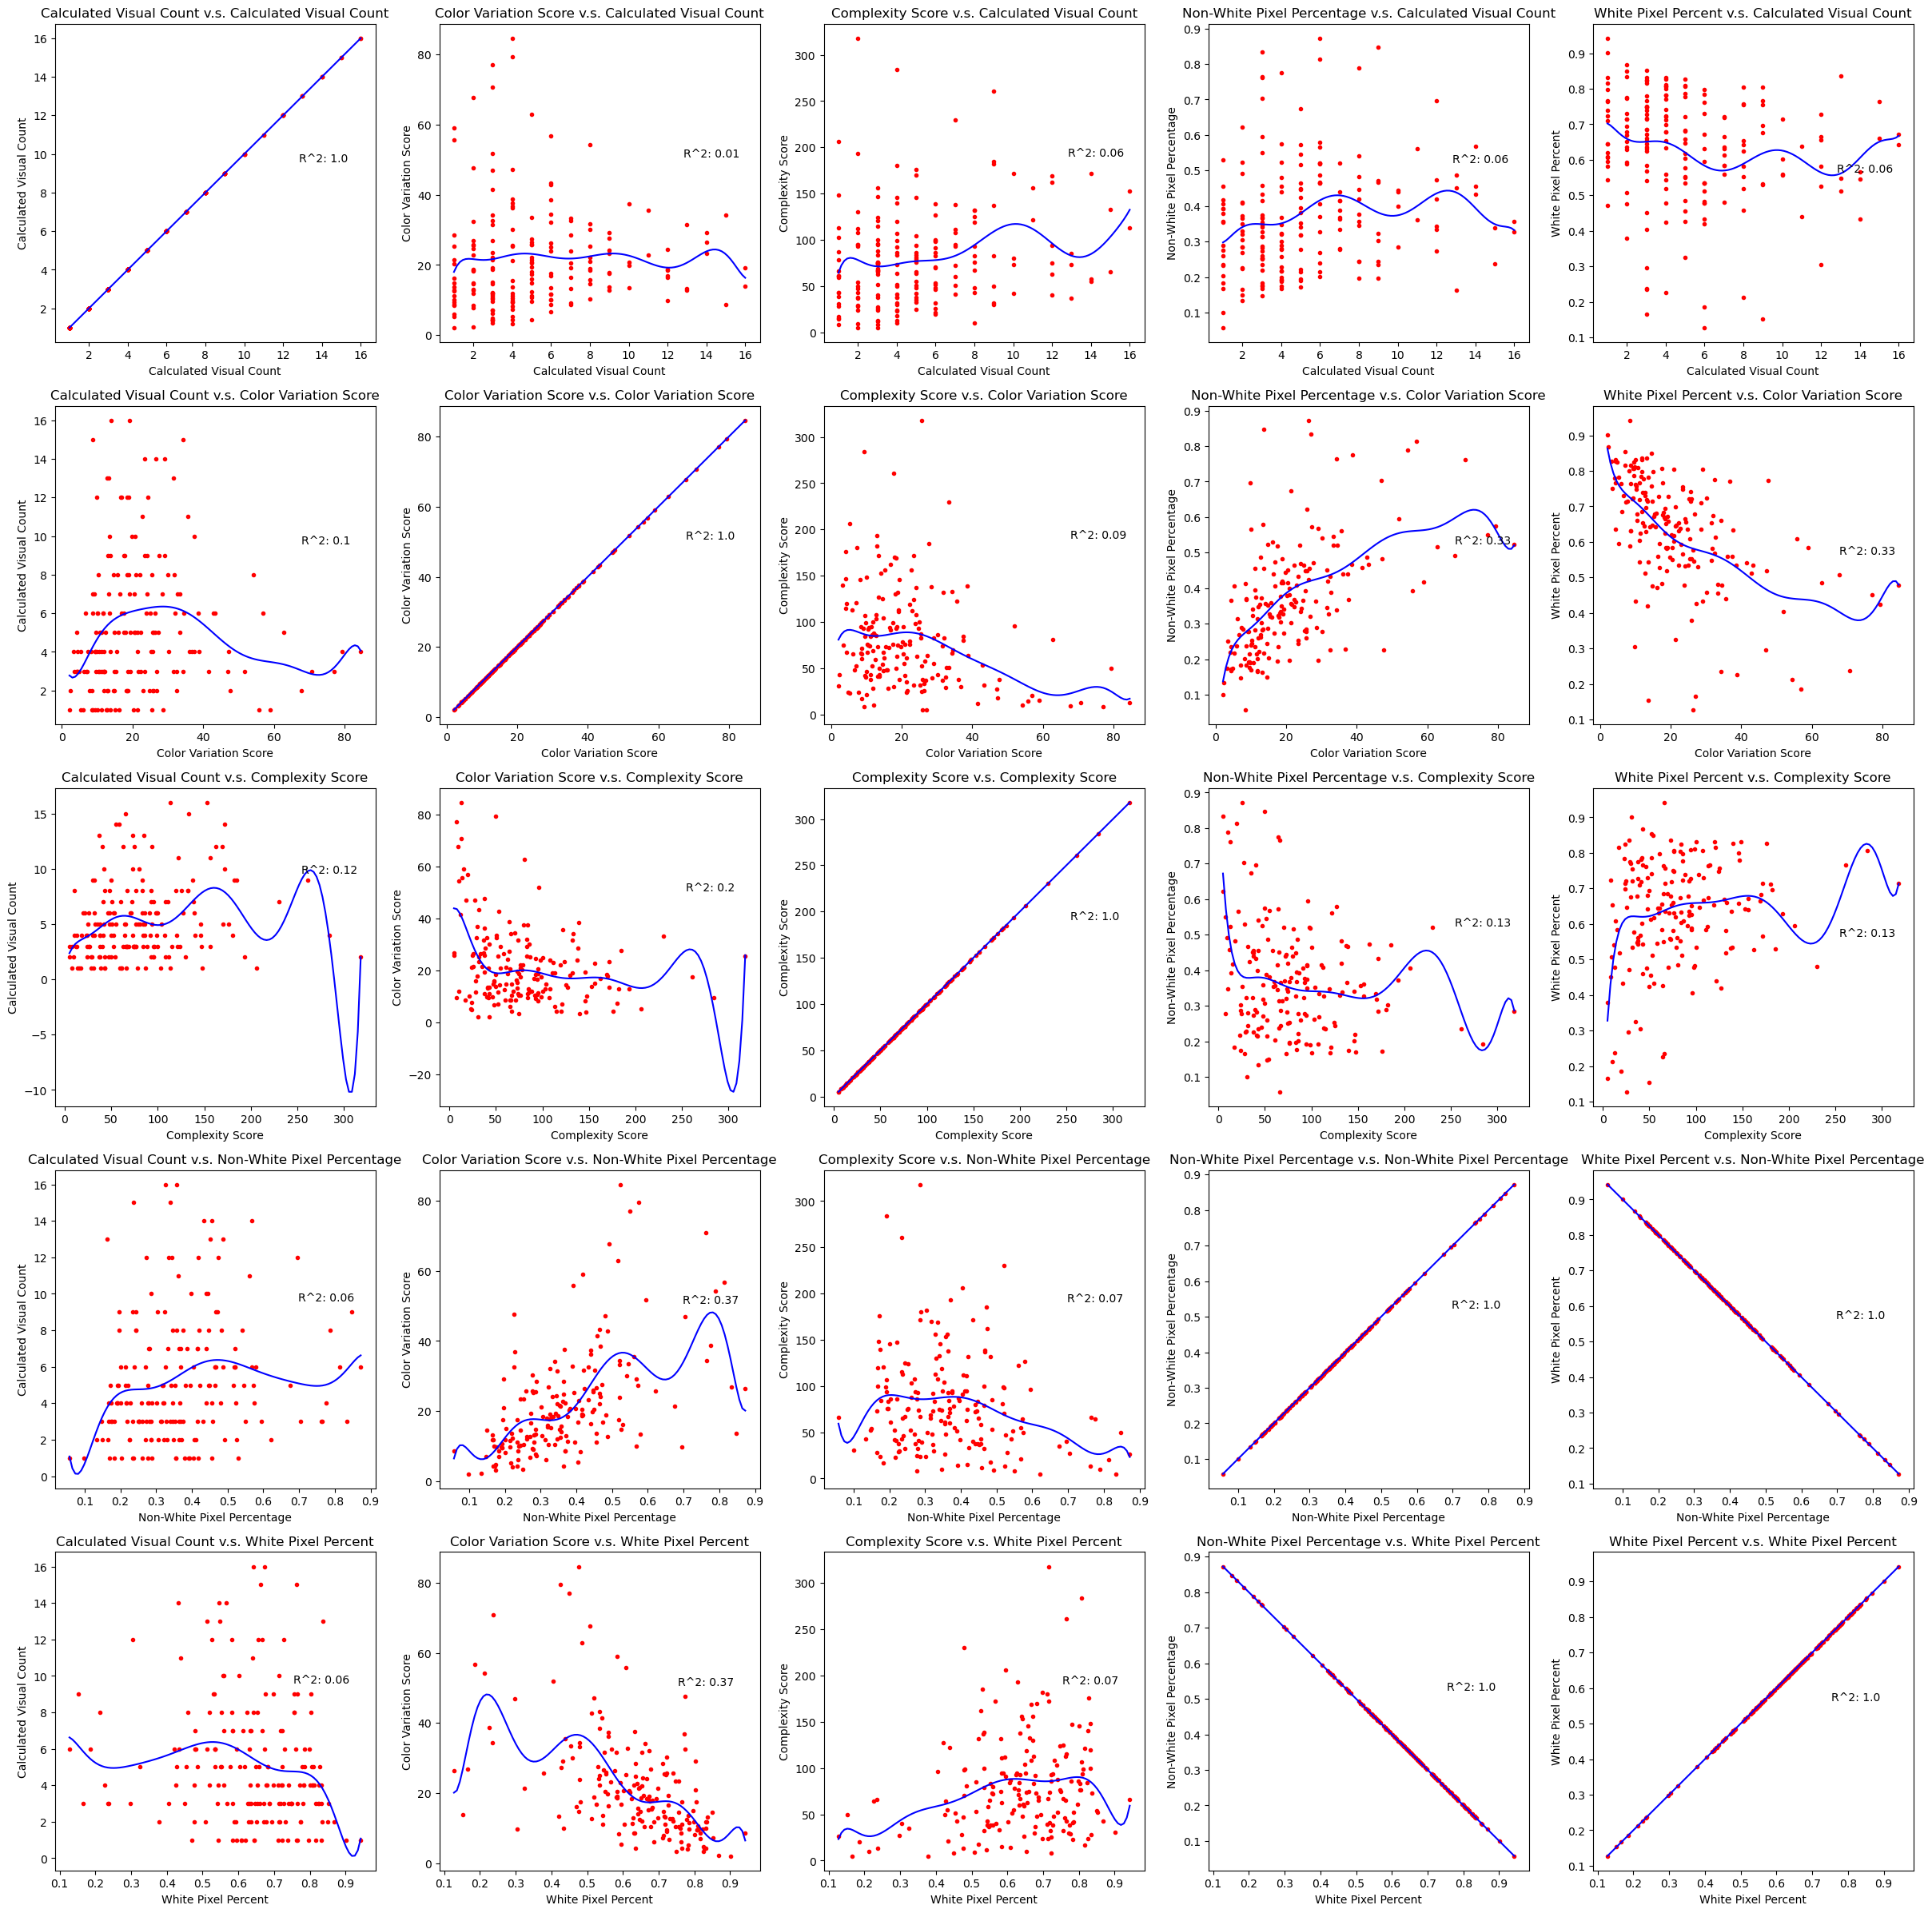

In [10]:
n_cols = size[1]
maxOrder = 10
plt.figure(figsize=(30,30))
i = 0
count = 1
data2 = data
headers = list(data.columns.values)
while i < n_cols:
    j = 0
    curX = data.iloc[:,i]
    while j < n_cols:
        curY = data.iloc[:,j]
        k = 0
        RScore = -100
        while k < maxOrder:
            
            model = np.poly1d(np.polyfit(curX,curY,k))
            newX = np.linspace(np.amin(curX), np.amax(curX), 183)
            y_predicted = model(curX)
            y_mean = np.mean(curY)
            num = np.sum((curY - y_predicted) **2)
            den = np.sum((curY - y_mean) ** 2)
            R = 1 - (num/den)

            if R >= RScore:
                maxR = R
                bestOrder = k
            k = k + 1
        realModel = np.poly1d(np.polyfit(curX,curY,bestOrder))
        newX = np.linspace(np.amin(curX), np.amax(curX), 100)

        plt.subplot(n_cols,n_cols,count)
        plt.plot(curX,curY, 'r.', newX, model(newX), 'b-')
        plt.text(0.8*np.amax(curX), 0.6*np.amax(curY), 'R^2: ' + str(round(maxR,2)))
        plt.xlabel(headers[i])
        plt.ylabel(headers[j])
        plt.title(headers[j] + ' v.s. ' + headers[i])
        count = count + 1
        j = j + 1
    i = i + 1

plt.savefig(os.getcwd() + '\\figure outputs\\Component Analysis.png')

## Using an UMAP Transformation

In [11]:
fit = umap.UMAP(random_state = 42)
embedding = fit.fit_transform(x)
embedding = np.hstack((Names, embedding))
embedding = pd.DataFrame(data = embedding, columns = ['Figure Number', 'UMAP 1', 'UMAP 2'])
embedding.to_excel(os.getcwd() + '\\output files\\UMAP Analysis.xlsx')

C:\Users\torre\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


## K Means Clustering with an UMAP Dimensionality Reduction

In [12]:
data = list(zip(embedding.iloc[:,1], embedding.iloc[:,2]))
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
kmeans.fit(data)

C:\Users\torre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=42)

## Plotting the UMAP Reduction using K Means Labels

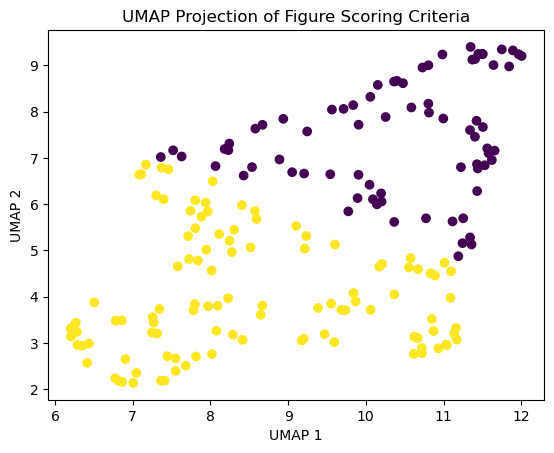

In [13]:
plt.scatter(embedding.iloc[:,1], embedding.iloc[:,2], c = kmeans.labels_)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Projection of Figure Scoring Criteria')
plt.savefig(os.getcwd() + '\\figure outputs\\UMAP Analysis.png')
UMAPLabels = kmeans.labels_

## TSNE Dimensionlality Reduction

In [14]:
tsne = TSNE(n_components = 2, random_state = 42)
X_tsne = tsne.fit_transform(x)
tsne.kl_divergence_
X_tsne = np.hstack((Names, X_tsne))
X_tsne = pd.DataFrame(data = X_tsne, columns = ['Figure Number', 'TSNE 1', 'TSNE 2'])
X_tsne.to_excel(os.getcwd() + '\\output files\\TSNE Analysis.xlsx')

## K Means Clustering with TSNE Reduction

In [15]:
data = list(zip(X_tsne.iloc[:,1], X_tsne.iloc[:,2]))
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
kmeans.fit(data)

C:\Users\torre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=42)

## Plotting TSNE Reduction with K Means Labels

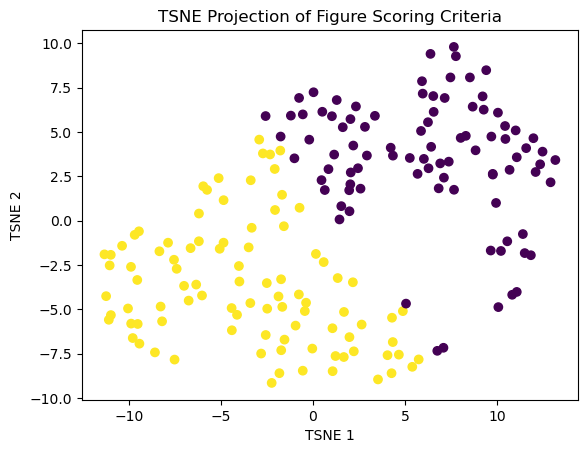

In [16]:
plt.scatter(X_tsne.iloc[:,1], X_tsne.iloc[:,2], c = kmeans.labels_)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('TSNE Projection of Figure Scoring Criteria')
plt.savefig(os.getcwd() + '\\figure outputs\\TSNE Analysis.png')
TSNELabels = kmeans.labels_

## Re Obtaining the Data

In [17]:
curPlace = os.getcwd() + '\output files\CombinedData.xlsx'
data = pd.read_excel(curPlace)
data = data.to_numpy()
size = np.shape(data)
Names = data[:,1]
data = data[:,2:size[1]]

## Combiniing all of the Labels into one File

In [18]:
Names = pd.DataFrame(Names)
PCALabels = pd.DataFrame(PCALabels)
UMAPLabels = pd.DataFrame(UMAPLabels)
TSNELabels = pd.DataFrame(TSNELabels)
Labels = np.hstack((PCALabels, UMAPLabels))
Labels = np.hstack((Labels, TSNELabels))
Labels = np.hstack((Names, Labels))
outputClasses = pd.DataFrame(data = Labels, columns = ['Figure Number', 'PCA Labbels','UMAP Labels', 'TSNE Labels'])



## Outputting all of the Class Labels for each Reduction

In [19]:
outputClasses.to_excel(os.getcwd() + '\\output files\\Class Labels.xlsx')